In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [30]:
df = pd.read_csv('data.csv')

In [31]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [32]:
df.columns=df.columns.str.lower().str.replace(' ','_')

In [62]:
df.head().T



cols = list(df.dtypes[df.dtypes == 'object'].index)
for col in cols:
    # df[col].fillna(0,inplace = True)
    df[col] = df[col].str.lower().str.replace(' ','_').str.replace('.','').str.replace('-','').str.replace(')','').str.replace('(','')

for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print("\n")
# print(len(df['rating'].unique()))

make
['bmw' 'audi' 'fiat' 'mercedesbenz' 'chrysler']


model
['1_series_m' '1_series' '100' '124_spider' '190class']


year
[2011 2012 2013 1992 1993]


engine_fuel_type
['premium_unleaded_required' 'regular_unleaded'
 'premium_unleaded_recommended' 'flexfuel_unleaded/e85' 'diesel']


engine_hp
[335. 300. 230. 320. 172.]


engine_cylinders
[ 6.  4.  5.  8. 12.]


transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']


driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']


number_of_doors
[ 2.  4.  3. nan]


market_category
['factory_tuner,luxury,highperformance' 'luxury,performance'
 'luxury,highperformance' 'luxury' 'performance']


vehicle_size
['compact' 'midsize' 'large']


vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']


highway_mpg
[26 28 27 25 24]


city_mpg
[19 20 18 17 16]


popularity
[3916 3105  819  617 1013]


msrp
[46135 40650 36350 29450 34500]




In [65]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_fuel_type      0
engine_hp            69
engine_cylinders     30
transmission_type     0
driven_wheels         0
number_of_doors       6
market_category       0
vehicle_size          0
vehicle_style         0
highway_mpg           0
city_mpg              0
popularity            0
msrp                  0
dtype: int64

In [79]:
df_copy = df.copy()
list(df_copy.dtypes[df_copy.dtypes == 'object'].index)

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [88]:

X=pd.get_dummies(df_copy,drop_first=True)
X = df_copy
X= X.drop(['msrp','make','model','engine_fuel_type','transmission_type','driven_wheels','market_category','vehicle_size','vehicle_style'],axis=1)

y = np.log1p(df_copy['msrp'])
X.fillna(0,inplace=True)
X.isnull().sum()

year                0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [90]:
for i in X.columns:
    print(i)

year
engine_hp
engine_cylinders
number_of_doors
highway_mpg
city_mpg
popularity


# Setting up the validation framework

In [91]:
from sklearn.model_selection import train_test_split


In [92]:
df_full_train, df_test,y_full_train,y_test = train_test_split(X,y, test_size=0.2, random_state=1)
df_train, df_val,y_train,y_val = train_test_split(df_full_train,y_full_train, test_size=0.25, random_state=1)
len(df_train),len(df_val),len(df_test), len(y_train),len(y_val),len(y_test)

df_train.columns

Index(['year', 'engine_hp', 'engine_cylinders', 'number_of_doors',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(df_train, y_train)

# Make predictions on the test data
y_pred = model.predict(df_test)

model.score(df_test,y_test)
# print(model.score)
# y_pred


0.785406840248571

<Axes: xlabel='msrp', ylabel='Count'>

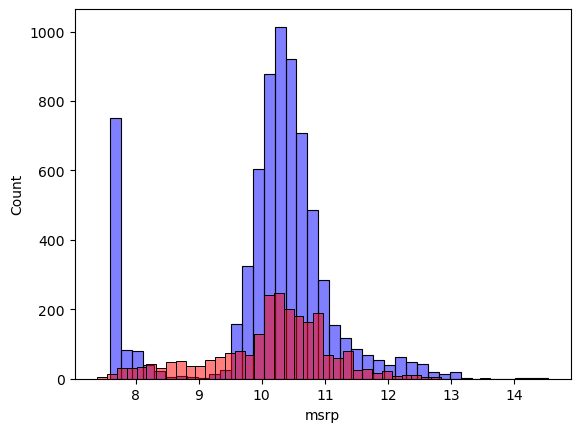

In [94]:
sns.histplot(y_train, color='blue', alpha=0.5, bins=40)
sns.histplot(y_pred, color='red', alpha=0.5, bins=40)